In [2]:
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [3]:
train = pd.read_csv("cross_train.csv")
test = pd.read_csv("cross_test.csv")

In [4]:
sample = pd.read_csv("sample_submission_iA3afxn.csv")

In [5]:
sample.head(5)

,id,Response
0,381110,0
1,381111,0
2,381112,0
3,381113,0
4,381114,0


In [6]:
train.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [7]:
train["Source"] = "train"

In [8]:
train.head(1)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Source
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,train


In [9]:
train.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
Source                  0
dtype: int64

In [10]:
train.duplicated().sum()

0

In [11]:
train.shape,test.shape

((381109, 13), (127037, 11))

In [12]:
test.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [13]:
test["Source"] = "test"

In [14]:
test.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Source
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53,test
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111,test
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199,test
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187,test
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297,test


In [15]:
df = pd.concat([train,test], ignore_index= True)

In [16]:
df.tail(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Source
508141,508142,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56,NaN,test
508142,508143,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165,NaN,test
508143,508144,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74,NaN,test
508144,508145,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265,NaN,test
508145,508146,Male,41,1,29.0,1,1-2 Year,No,27927.0,124.0,231,NaN,test


In [17]:
381109+127037

508146

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508146 entries, 0 to 508145
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    508146 non-null  int64  
 1   Gender                508146 non-null  object 
 2   Age                   508146 non-null  int64  
 3   Driving_License       508146 non-null  int64  
 4   Region_Code           508146 non-null  float64
 5   Previously_Insured    508146 non-null  int64  
 6   Vehicle_Age           508146 non-null  object 
 7   Vehicle_Damage        508146 non-null  object 
 8   Annual_Premium        508146 non-null  float64
 9   Policy_Sales_Channel  508146 non-null  float64
 10  Vintage               508146 non-null  int64  
 11  Response              381109 non-null  float64
 12  Source                508146 non-null  object 
dtypes: float64(4), int64(5), object(4)
memory usage: 50.4+ MB


In [19]:
df["Gender"].value_counts(dropna = False)

Male      274325
Female    233821
Name: Gender, dtype: int64

In [20]:
df["Gender"].replace({"Male":0,"Female":1}, inplace = True)

In [21]:
df["Gender"].value_counts(dropna = False)

0    274325
1    233821
Name: Gender, dtype: int64

In [22]:
df["Driving_License"].value_counts(dropna = False)

1    507097
0      1049
Name: Driving_License, dtype: int64

In [23]:
df["Vehicle_Age"].value_counts(dropna = False)

1-2 Year     267015
< 1 Year     219805
> 2 Years     21326
Name: Vehicle_Age, dtype: int64

In [24]:
df["Vehicle_Age"].replace({"1-2 Year":0,"< 1 Year":1,"> 2 Years":2}, inplace = True)

In [25]:
df["Vehicle_Age"].value_counts(dropna = False)

0    267015
1    219805
2     21326
Name: Vehicle_Age, dtype: int64

In [26]:
df["Vehicle_Damage"].value_counts(dropna = False)

Yes    256248
No     251898
Name: Vehicle_Damage, dtype: int64

In [27]:
df["Vehicle_Damage"].replace({"Yes":0,"No":1}, inplace = True)

In [28]:
df["Vehicle_Damage"].value_counts(dropna = False)

0    256248
1    251898
Name: Vehicle_Damage, dtype: int64

In [45]:
df["Annual_Premium"].value_counts(dropna = False)

2630     86488
69856      185
45179       57
38452       56
39008       55
         ...  
45883        1
18195        1
81070        1
55599        1
62875        1
Name: Annual_Premium, Length: 52062, dtype: int64

In [46]:
df["Annual_Premium"] = df["Annual_Premium"].astype(np.int64)

In [47]:
df["Region_Code"] = df["Region_Code"].astype(np.int64)

In [48]:
df.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Source
0,1,0,44,1,28,0,2,0,40454,26.0,217,1.0,train
1,2,0,76,1,3,0,0,1,33536,26.0,183,0.0,train
2,3,0,47,1,28,0,2,0,38294,26.0,27,1.0,train
3,4,0,21,1,11,1,1,1,28619,152.0,203,0.0,train
4,5,1,29,1,41,1,1,1,27496,152.0,39,0.0,train


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508146 entries, 0 to 508145
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    508146 non-null  int64  
 1   Gender                508146 non-null  int64  
 2   Age                   508146 non-null  int64  
 3   Driving_License       508146 non-null  int64  
 4   Region_Code           508146 non-null  int64  
 5   Previously_Insured    508146 non-null  int64  
 6   Vehicle_Age           508146 non-null  int64  
 7   Vehicle_Damage        508146 non-null  int64  
 8   Annual_Premium        508146 non-null  int64  
 9   Policy_Sales_Channel  508146 non-null  float64
 10  Vintage               508146 non-null  int64  
 11  Response              381109 non-null  float64
 12  Source                508146 non-null  object 
dtypes: float64(2), int64(10), object(1)
memory usage: 50.4+ MB


In [74]:
train_pre = df[df["Source"] == "train"]
test_pre = df[df["Source"] == "test"]

In [75]:
test_pre.head(1)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Source
381109,381110,0,25,1,11,1,1,1,35786,152.0,53,NaN,test


In [76]:
test_pre = test_pre.reset_index().drop(columns= 'index')

In [77]:
test_pre.head(1)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Source
0,381110,0,25,1,11,1,1,1,35786,152.0,53,NaN,test


In [78]:
test_pre.tail(1)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Source
127036,508146,0,41,1,29,1,0,1,27927,124.0,231,NaN,test


In [79]:
train_pre = train_pre.drop(columns=["Source"])
test_pre = test_pre.drop(columns=["Source"])

In [80]:
train_pre.head(1)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0,44,1,28,0,2,0,40454,26.0,217,1.0


In [81]:
test_pre.head(1)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,381110,0,25,1,11,1,1,1,35786,152.0,53,NaN


In [82]:
train_pre.to_csv("train_pre.csv", index = False)
test_pre.to_csv("test_pre.csv", index = False)

In [83]:
X = train_pre.drop(columns=["Policy_Sales_Channel",'Response',"id"], axis = 1)
y = train_pre["Response"]
y = y.astype(np.int64)

In [84]:
y.head(1)

0    1
Name: Response, dtype: int64

In [134]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_curve,roc_auc_score

In [86]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.2,random_state=42)
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((304887, 9), (76222, 9), (304887,), (76222,))

In [87]:
X.head(5)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage
0,0,44,1,28,0,2,0,40454,217
1,0,76,1,3,0,0,1,33536,183
2,0,47,1,28,0,2,0,38294,27
3,0,21,1,11,1,1,1,28619,203
4,1,29,1,41,1,1,1,27496,39


In [88]:
model = LogisticRegression()
model.fit(train_X,train_y)

LogisticRegression()

In [89]:
y_pred = model.predict(train_X)
print('Train accuracy')
print('accuracy score',accuracy_score(train_y,y_pred))
print('f1 score',f1_score(train_y,y_pred))
print('confusion matrix\n',confusion_matrix(train_y,y_pred))

Train accuracy
accuracy score 0.8779875822845842
f1 score 0.0009131439007358865
confusion matrix
 [[267670     30]
 [ 37170     17]]


In [91]:
model1 = LinearRegression()
model1.fit(train_X,train_y)

LinearRegression()

In [92]:
y_pred1 = model1.predict(train_X)
print('score',roc_auc_score(train_y,y_pred1))

score 0.8123757578872819


In [93]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(train_X,train_y)

DecisionTreeRegressor()

In [95]:
y_pred = decision_tree.predict(train_X)
print('score',roc_auc_score(train_y,y_pred))

score 0.9999974037564934


In [112]:
rf = RandomForestRegressor()
rf.fit(train_X,train_y)

RandomForestRegressor()

In [113]:
y_pred2 = rf.predict(train_X)
y_pred2 = model1.predict(train_X)
print('score',roc_auc_score(train_y,y_pred2))

score 0.8123757578872819


In [116]:
ad = AdaBoostClassifier()
ad.fit(train_X,train_y)

AdaBoostClassifier()

In [120]:
print('score',roc_auc_score(train_y,y_pred))

score 0.9999974037564934


In [140]:
def ml(model,train_X = train_X, train_y = train_y,test_X = test_X,test_y=test_y):
    print(model)
    model.fit(train_X,train_y)
    train_pred = model.predict(train_X)
    print("Train Accuracy : ",accuracy_score(train_y, train_pred))
    test_pred = model.predict(test_X)
    print("Test Accuracy : ",accuracy_score(test_y, test_pred))

In [142]:
model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = RandomForestClassifier()
model4 = AdaBoostClassifier()
voting = VotingClassifier(estimators = [('LR', model1), ('DT', model2), ('RF', model3), ('Ada', model4)], voting = 'hard')

In [143]:
ml(voting)

VotingClassifier(estimators=[('LR', LogisticRegression()),
                             ('DT', DecisionTreeClassifier()),
                             ('RF', RandomForestClassifier()),
                             ('Ada', AdaBoostClassifier())])
Train Accuracy :  0.8780859793956449
Test Accuracy :  0.8750491983941644


In [97]:
test_pre.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,381110,0,25,1,11,1,1,1,35786,152.0,53,NaN
1,381111,0,40,1,28,0,0,0,33762,7.0,111,NaN
2,381112,0,47,1,28,0,0,0,40050,124.0,199,NaN
3,381113,0,24,1,27,1,1,0,37356,152.0,187,NaN
4,381114,0,27,1,28,1,1,1,59097,152.0,297,NaN


In [103]:
test_pre = test_pre.drop(columns=["Policy_Sales_Channel","id"])

In [104]:
test_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   Gender              127037 non-null  int64
 1   Age                 127037 non-null  int64
 2   Driving_License     127037 non-null  int64
 3   Region_Code         127037 non-null  int64
 4   Previously_Insured  127037 non-null  int64
 5   Vehicle_Age         127037 non-null  int64
 6   Vehicle_Damage      127037 non-null  int64
 7   Annual_Premium      127037 non-null  int64
 8   Vintage             127037 non-null  int64
dtypes: int64(9)
memory usage: 8.7 MB


In [106]:
t = decision_tree.predict(test_pre)

In [107]:
sample["Response"] = t

In [108]:
sample.to_csv('Cs.csv',index=False)

## DT

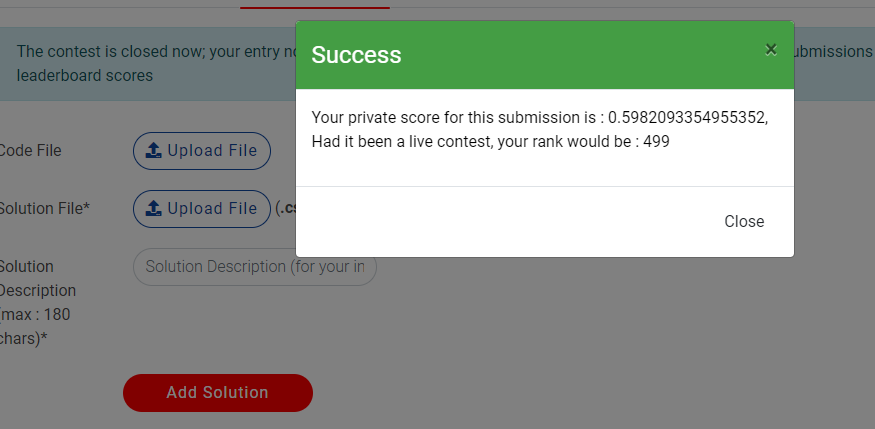